In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns

In [2]:
data = pd.read_csv('./data/DR9_LRG_data.csv')

In [3]:
ra = data['RA']
dec = data['DEC']

In [4]:
len(ra)

8130293

Text(0, 0.5, 'DEC')

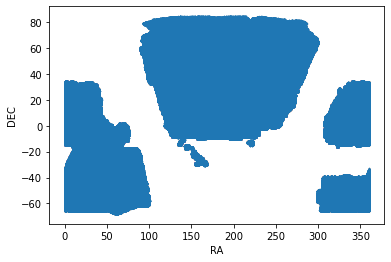

In [4]:
pl.scatter(ra, dec, s=0.2)
pl.xlabel('RA')
pl.ylabel('DEC')

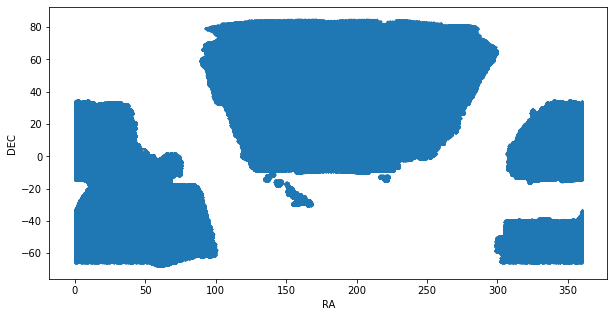

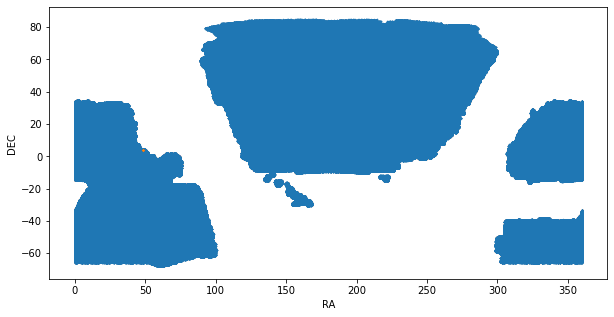

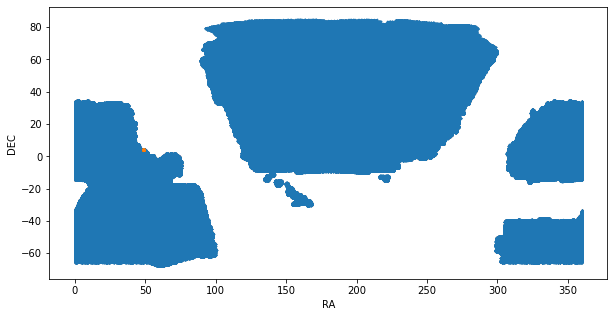

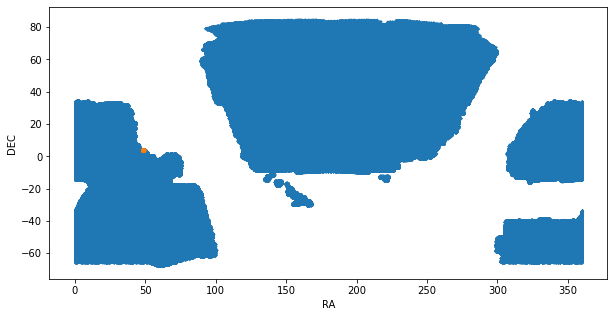

In [5]:
radii = [0.01,0.1,0.5,1]
for r in radii:
    pl.figure(figsize=(10,5))
    ii = (ra - ra[100])**2 + (dec - dec[100])**2 <= r**2
    pl.scatter(ra[~ii], dec[~ii], s=0.2)
    pl.scatter(ra[ii], dec[ii], s=0.5)

    pl.xlabel('RA')
    pl.ylabel('DEC')

In [ ]:
MEAN_E_R = np.zeros(len(radii), object)
MEAN_PHI_R = np.zeros(len(radii), object)

for i, r in enumerate(radii):
    mean_e_temp = []
    mean_phi_temp = []
    for ra_, dec_ in zip(ra,dec):
        ii = (ra - ra_)**2 + (dec - dec_)**2 <= r**2
        mean_e_temp.append(np.mean(data['E'][ii]))
        mean_phi_temp.append(np.mean(data['PHI'][ii]))
    MEAN_E_R[i]   =  mean_e_temp
    MEAN_PHI_R[i] =  mean_phi_temp

In [ ]:
new_data = pd.DataFrame( np.c_[data.values, MEAN_E_R[0], MEAN_E_R[1], MEAN_E_R[2], MEAN_E_R[3], MEAN_PHI_R[0], MEAN_PHI_R[1], MEAN_PHI_R[2], MEAN_PHI_R[3]], columns=list(data.keys())+['MEAN_E_R1','MEAN_E_R2','MEAN_E_R3','MEAN_E_R4','MEAN_PHI_R1','MEAN_PHI_R2','MEAN_PHI_R3','MEAN_PHI_R4'])
new_data

In [ ]:
sns.pairplot(new_data, x_vars=['MEAN_E_R1','MEAN_E_R2','MEAN_E_R3','MEAN_E_R4','MEAN_PHI_R1','MEAN_PHI_R2','MEAN_PHI_R3','MEAN_PHI_R4'], y_vars=['E'])

In [ ]:
E_vec = np.c_[ new_data['E']*np.cos(new_data['PHI']*np.pi/180), new_data['E']*np.sin(new_data['PHI']*np.pi/180) ]
E_mean_vec_R1 = np.c_[new_data['MEAN_E_R1']*np.cos(new_data['MEAN_PHI_R1']*np.pi/180),  new_data['MEAN_E_R1']*np.sin(new_data['MEAN_PHI_R1']*np.pi/180) ]
E_mean_vec_R2 = np.c_[new_data['MEAN_E_R2']*np.cos(new_data['MEAN_PHI_R2']*np.pi/180),  new_data['MEAN_E_R2']*np.sin(new_data['MEAN_PHI_R2']*np.pi/180) ]
E_mean_vec_R3 = np.c_[new_data['MEAN_E_R3']*np.cos(new_data['MEAN_PHI_R3']*np.pi/180),  new_data['MEAN_E_R3']*np.sin(new_data['MEAN_PHI_R3']*np.pi/180) ]
E_mean_vec_R4 = np.c_[new_data['MEAN_E_R4']*np.cos(new_data['MEAN_PHI_R4']*np.pi/180),  new_data['MEAN_E_R4']*np.sin(new_data['MEAN_PHI_R4']*np.pi/180) ]

In [ ]:
np.shape(E_vec), np.shape(E_mean_vec_R1)

In [ ]:
align_R1 = np.arccos( sum(E_vec.T*E_mean_vec_R1.T)/(np.sqrt(sum(E_vec.T*E_vec.T))*np.sqrt(sum(E_mean_vec_R1.T*E_mean_vec_R1.T))) )*180/np.pi
_ = pl.hist( align_R1, bins=50 )
print(np.percentile(align_R1, 95))
pl.axvline(np.percentile(align_R1, 95), label='95%', color='k', linestyle='dashed', linewidth=2)
pl.show()

In [ ]:
align_R2 = np.arccos( sum(E_vec.T*E_mean_vec_R2.T)/(np.sqrt(sum(E_vec.T*E_vec.T))*np.sqrt(sum(E_mean_vec_R2.T*E_mean_vec_R2.T))) )*180/np.pi
_ = pl.hist( align_R2 , bins=50 )
print(np.percentile(align_R2, 95))
pl.axvline(np.percentile(align_R2, 95), label='95%', color='k', linestyle='dashed', linewidth=2)
pl.show()

In [ ]:
align_R3 = np.arccos( sum(E_vec.T*E_mean_vec_R3.T)/(np.sqrt(sum(E_vec.T*E_vec.T))*np.sqrt(sum(E_mean_vec_R3.T*E_mean_vec_R3.T))) )*180/np.pi
_ = pl.hist(align_R3 , bins=50  )
print(np.percentile(align_R3, 95))
pl.axvline(np.percentile(align_R3, 95), label='95%', color='k', linestyle='dashed', linewidth=2)
pl.show()

In [ ]:
align_R4 = np.arccos( sum(E_vec.T*E_mean_vec_R4.T)/(np.sqrt(sum(E_vec.T*E_vec.T))*np.sqrt(sum(E_mean_vec_R4.T*E_mean_vec_R4.T))) )*180/np.pi
_ = pl.hist( align_R4 , bins=50 )
print(np.percentile(align_R4, 95))
pl.axvline(np.percentile(align_R4, 95), label='95%', color='k', linestyle='dashed', linewidth=2)
pl.show()